张亦晴 3120235334

第二个数据集：

来源： Microsoft 资讯推荐 https://learn.microsoft.com/zh-cn/azure/open-datasets/dataset-microsoft-news?tabs=azureml-opendatasets

本数据集关于Microsoft新闻关系分析

数据获取与预处理

In [ ]:
import os
import tempfile
import shutil
import urllib
import zipfile
import pandas as pd

temp_dir = os.path.join(tempfile.gettempdir(), 'mind')
os.makedirs(temp_dir, exist_ok=True)

base_url = 'https://mind201910small.blob.core.windows.net/release'
training_small_url = f'{base_url}/MINDsmall_train.zip'
validation_small_url = f'{base_url}/MINDsmall_dev.zip'
training_large_url = f'{base_url}/MINDlarge_train.zip'
validation_large_url = f'{base_url}/MINDlarge_dev.zip'

In [2]:
def download_url(url,
                 destination_filename=None,
                 progress_updater=None,
                 force_download=False,
                 verbose=True):
    if not verbose:
        progress_updater = None

    if destination_filename is None:
        url_as_filename = url.replace('://', '_').replace('/', '_')
        destination_filename = \
            os.path.join(temp_dir,url_as_filename)
    if (not force_download) and (os.path.isfile(destination_filename)):
        if verbose:
            print('Bypassing download of already-downloaded file {}'.format(
                os.path.basename(url)))
        return destination_filename
    if verbose:
        print('Downloading file {} to {}'.format(os.path.basename(url),
                                                 destination_filename),
              end='')
    urllib.request.urlretrieve(url, destination_filename, progress_updater)
    assert (os.path.isfile(destination_filename))
    nBytes = os.path.getsize(destination_filename)
    if verbose:
        print('...done, {} bytes.'.format(nBytes))
    return destination_filename

In [3]:
zip_path = download_url(validation_small_url, verbose=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)

os.listdir(temp_dir)

['behaviors.tsv',
 'entity_embedding.vec',
 'https_mind201910small.blob.core.windows.net_release_MINDsmall_dev.zip',
 'news.tsv',
 'relation_embedding.vec']

In [33]:
behaviors_path = os.path.join(temp_dir, 'behaviors.tsv')
impression_behaviors = pd.read_table(
    behaviors_path,
    header=None,
    names=['impression_id', 'user_id', 'time', 'history', 'impressions'])
impression_behaviors['impressions']

0        N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...
1        N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...
2        N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...
3        N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...
4        N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...
                               ...                        
73147    N496-0 N35159-0 N59856-0 N13270-0 N47213-0 N26...
73148    N49285-0 N31958-0 N55237-0 N42844-0 N29862-0 N...
73149    N7043-0 N512-0 N60215-1 N45057-0 N496-0 N37055...
73150    N23692-0 N19990-0 N20187-0 N5940-0 N13408-0 N3...
73151    N29862-0 N5472-0 N21679-1 N6400-0 N53572-0 N50...
Name: impressions, Length: 73152, dtype: object

In [43]:

def extract_positive_ids(record):
    parts = ''.join(record).split()
    new_record = list()
    for part in parts:
        if part.endswith('-1'):
            new_record.append(part[:-2])
    return new_record
        
impression_behaviors["new_impressions"] =impression_behaviors["impressions"].apply(extract_positive_ids)
impression_behaviors


,impression_id,user_id,time,history,impressions,new_impressions
0,1,U80234,11/15/2019 12:37:50 PM,N55189 N46039 N51741 N53234 N11276 N264 N40716...,N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...,[N31958]
1,2,U60458,11/15/2019 7:11:50 AM,N58715 N32109 N51180 N33438 N54827 N28488 N611...,N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...,[N23513]
2,3,U44190,11/15/2019 9:55:12 AM,N56253 N1150 N55189 N16233 N61704 N51706 N5303...,N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...,[N5940]
3,4,U87380,11/15/2019 3:12:46 PM,N63554 N49153 N28678 N23232 N43369 N58518 N444...,N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...,[N15347]
4,5,U9444,11/15/2019 8:25:46 AM,N51692 N18285 N26015 N22679 N55556,N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...,"[N5940, N31958]"
...,...,...,...,...,...,...
73147,73148,U77536,11/15/2019 8:40:16 PM,N28691 N8845 N58434 N37120 N22185 N60033 N4702...,N496-0 N35159-0 N59856-0 N13270-0 N47213-0 N26...,"[N38324, N6916, N56080, N54562, N13573, N60244..."
73148,73149,U56193,11/15/2019 1:11:26 PM,N4705 N58782 N53531 N46492 N26026 N28088 N3109...,N49285-0 N31958-0 N55237-0 N42844-0 N29862-0 N...,[N11390]
73149,73150,U16799,11/15/2019 3:37:06 PM,N40826 N42078 N15670 N15295 N64536 N46845 N52294,N7043-0 N512-0 N60215-1 N45057-0 N496-0 N37055...,"[N60215, N54562]"
73150,73151,U8786,11/15/2019 8:29:26 AM,N3046 N356 N20483 N46107 N44598 N18693 N8254 N...,N23692-0 N19990-0 N20187-0 N5940-0 N13408-0 N3...,[N20036]


In [50]:
impression_behaviors.dtypes

impression_id       int64
user_id            object
time               object
history            object
impressions        object
new_impressions    object
dtype: object

In [53]:
def extract_history_ids(record):
    new_record = record.split()
    return new_record

impression_behaviors.dropna(subset=['history'],inplace = True)
impression_behaviors["new_history"] =impression_behaviors["history"].apply(extract_history_ids)
impression_behaviors

,impression_id,user_id,time,history,impressions,new_impressions,new_history
0,1,U80234,11/15/2019 12:37:50 PM,N55189 N46039 N51741 N53234 N11276 N264 N40716...,N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...,[N31958],"[N55189, N46039, N51741, N53234, N11276, N264,..."
1,2,U60458,11/15/2019 7:11:50 AM,N58715 N32109 N51180 N33438 N54827 N28488 N611...,N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...,[N23513],"[N58715, N32109, N51180, N33438, N54827, N2848..."
2,3,U44190,11/15/2019 9:55:12 AM,N56253 N1150 N55189 N16233 N61704 N51706 N5303...,N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...,[N5940],"[N56253, N1150, N55189, N16233, N61704, N51706..."
3,4,U87380,11/15/2019 3:12:46 PM,N63554 N49153 N28678 N23232 N43369 N58518 N444...,N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...,[N15347],"[N63554, N49153, N28678, N23232, N43369, N5851..."
4,5,U9444,11/15/2019 8:25:46 AM,N51692 N18285 N26015 N22679 N55556,N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...,"[N5940, N31958]","[N51692, N18285, N26015, N22679, N55556]"
...,...,...,...,...,...,...,...
73147,73148,U77536,11/15/2019 8:40:16 PM,N28691 N8845 N58434 N37120 N22185 N60033 N4702...,N496-0 N35159-0 N59856-0 N13270-0 N47213-0 N26...,"[N38324, N6916, N56080, N54562, N13573, N60244...","[N28691, N8845, N58434, N37120, N22185, N60033..."
73148,73149,U56193,11/15/2019 1:11:26 PM,N4705 N58782 N53531 N46492 N26026 N28088 N3109...,N49285-0 N31958-0 N55237-0 N42844-0 N29862-0 N...,[N11390],"[N4705, N58782, N53531, N46492, N26026, N28088..."
73149,73150,U16799,11/15/2019 3:37:06 PM,N40826 N42078 N15670 N15295 N64536 N46845 N52294,N7043-0 N512-0 N60215-1 N45057-0 N496-0 N37055...,"[N60215, N54562]","[N40826, N42078, N15670, N15295, N64536, N4684..."
73150,73151,U8786,11/15/2019 8:29:26 AM,N3046 N356 N20483 N46107 N44598 N18693 N8254 N...,N23692-0 N19990-0 N20187-0 N5940-0 N13408-0 N3...,[N20036],"[N3046, N356, N20483, N46107, N44598, N18693, ..."


In [54]:
news_path = os.path.join(temp_dir, 'news.tsv')
news_df = pd.read_table(news_path,
              header=None,
              names=[
                  'id', 'category', 'subcategory', 'title', 'abstract', 'url',
                  'title_entities', 'abstract_entities'
              ])

In [57]:
id_to_subcategory = dict(zip(news_df['id'], news_df['subcategory']))

def ids_to_subcategories(ids):
    return [id_to_subcategory.get(news_id, '') for news_id in ids]

impression_behaviors['new_history'] = impression_behaviors['new_history'].apply(
    ids_to_subcategories)
impression_behaviors['new_impressions'] = impression_behaviors['new_impressions'].apply(
    ids_to_subcategories)

In [58]:
impression_behaviors

,impression_id,user_id,time,history,impressions,new_impressions,new_history
0,1,U80234,11/15/2019 12:37:50 PM,N55189 N46039 N51741 N53234 N11276 N264 N40716...,N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...,[football_nfl],"[tvnews, newsus, tv-celebrity, newsus, finance..."
1,2,U60458,11/15/2019 7:11:50 AM,N58715 N32109 N51180 N33438 N54827 N28488 N611...,N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...,[football_nfl],"[newsus, travelnews, finance-companies, newssc..."
2,3,U44190,11/15/2019 9:55:12 AM,N56253 N1150 N55189 N16233 N61704 N51706 N5303...,N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...,[lifestyleroyals],"[football_nfl, newscrime, tvnews, newsus, shop..."
3,4,U87380,11/15/2019 3:12:46 PM,N63554 N49153 N28678 N23232 N43369 N58518 N444...,N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...,[football_nfl],"[traveltripideas, newsus, baseball_mlb, footba..."
4,5,U9444,11/15/2019 8:25:46 AM,N51692 N18285 N26015 N22679 N55556,N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...,"[lifestyleroyals, football_nfl]","[tv-celebrity, football_nfl, celebrity, golf, ..."
...,...,...,...,...,...,...,...
73147,73148,U77536,11/15/2019 8:40:16 PM,N28691 N8845 N58434 N37120 N22185 N60033 N4702...,N496-0 N35159-0 N59856-0 N13270-0 N47213-0 N26...,"[medical, celebrity, football_nfl, finance-com...","[movienews, tv-celebrity, newsus, foodnews, fi..."
73148,73149,U56193,11/15/2019 1:11:26 PM,N4705 N58782 N53531 N46492 N26026 N28088 N3109...,N49285-0 N31958-0 N55237-0 N42844-0 N29862-0 N...,[newscrime],"[movies-celebrity, movies-celebrity, tv-celebr..."
73149,73150,U16799,11/15/2019 3:37:06 PM,N40826 N42078 N15670 N15295 N64536 N46845 N52294,N7043-0 N512-0 N60215-1 N45057-0 N496-0 N37055...,"[autosclassics, finance-companies]","[tvnews, newsus, tv-celebrity, tv-celebrity, m..."
73150,73151,U8786,11/15/2019 8:29:26 AM,N3046 N356 N20483 N46107 N44598 N18693 N8254 N...,N23692-0 N19990-0 N20187-0 N5940-0 N13408-0 N3...,[shop-holidays],"[lifestyleroyals, lifestyleroyals, lifestylero..."


频繁模式挖掘：新闻的亚类型

In [61]:
dataset = impression_behaviors['new_impressions']+impression_behaviors['new_history']

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,ads-latingrammys,ads-lung-health,advice,animals,autosbuying,autoscartech,autosclassics,autoscompact,autosenthusiasts,autoshybrids,...,viral,voices,weatherfullscreenmaps,weathertopstories,weight-loss,weightloss,wellness,wines,wonder,yearinoffbeatgoodnews
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70933,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
70934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70935,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [63]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.230201,(autosnews),1
1,0.253193,(baseball_mlb),1
2,0.226945,(basketball_nba),1
3,0.276453,(celebrity),1
4,0.250049,(entertainment-celebrity),1
...,...,...,...
207,0.206363,"(newsus, tv-celebrity, movies-celebrity, newsw...",4
208,0.233514,"(newspolitics, newsus, newscrime, newsworld)",4
209,0.228312,"(newspolitics, newsus, tv-celebrity, newscrime)",4
210,0.250275,"(newsus, tv-celebrity, newsworld, newscrime)",4


对挖掘结果进行分析

In [69]:
from mlxtend.frequent_patterns import association_rules

ar = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(travelnews),(newsus),0.330951,0.758282,0.297993,0.900413,1.187439,0.047038,2.427210,0.235934
1,"(football_nfl, finance-companies)",(newsus),0.244326,0.758282,0.224971,0.920782,1.214301,0.039703,3.051317,0.233541
2,"(finance-companies, lifestylebuzz)",(newsus),0.245792,0.758282,0.230497,0.937772,1.236707,0.044117,3.884421,0.253777
3,"(finance-companies, newscrime)",(newsus),0.255279,0.758282,0.242606,0.950356,1.253302,0.049033,4.869047,0.271387
4,"(newspolitics, finance-companies)",(newsus),0.244044,0.758282,0.228679,0.937038,1.235738,0.043624,3.839105,0.252352
...,...,...,...,...,...,...,...,...,...,...
63,"(tv-celebrity, movies-celebrity, newsworld)",(newsus),0.215724,0.758282,0.206363,0.956610,1.261549,0.042784,5.570802,0.264350
64,"(newspolitics, newscrime, newsworld)",(newsus),0.242212,0.758282,0.233514,0.964090,1.271414,0.049849,6.731282,0.281707
65,"(newspolitics, tv-celebrity, newscrime)",(newsus),0.239702,0.758282,0.228312,0.952482,1.256105,0.046550,5.086850,0.268169
66,"(tv-celebrity, newscrime, newsworld)",(newsus),0.260566,0.758282,0.250275,0.960506,1.266688,0.052693,6.120435,0.284730


In [81]:
frequent_itemsets_filter = frequent_itemsets[frequent_itemsets['length'] == 2]
frequent_itemsets_filter_reset = frequent_itemsets_filter.reset_index(drop=True)

In [82]:

news_type_df = pd.DataFrame(frequent_itemsets_filter_reset['itemsets'].tolist(), columns=['start_point', 'end_point'])
news_type_df['weight'] = frequent_itemsets_filter_reset['support']
news_type_df
#G = nx.from_pandas_edgelist(news_type, "start_node", "end_node")

,start_point,end_point,weight
0,newsus,autosnews,0.206659
1,football_nfl,baseball_mlb,0.203910
2,newsus,baseball_mlb,0.221066
3,celebrity,newsus,0.232668
4,celebrity,tv-celebrity,0.217598
...,...,...,...
78,newsus,weathertopstories,0.200259
79,newsworld,travelnews,0.237038
80,tv-celebrity,newsworld,0.333432
81,tv-celebrity,travelnews,0.233993


可视化展示

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

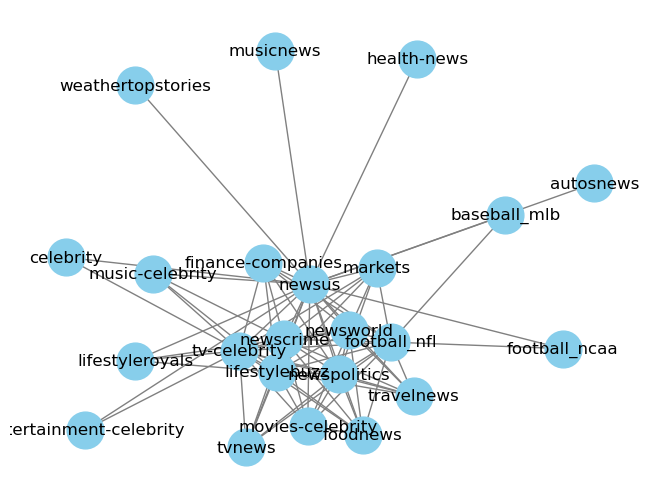

In [87]:
G = nx.from_pandas_edgelist(news_type_df, "start_point", "end_point", edge_attr='weight')

pos = nx.spring_layout(G)  # 生成节点的位置布局
edge_weights = nx.get_edge_attributes(G, 'weight')  # 获取边权重

# 绘制节点和边
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()